In [22]:
import pandas as pd

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data=pd.read_csv("ProjectData - PATIENT OUTCOME.csv")

In [25]:
data.head()


,"Gender(m-1,f-0)",NOP(AGE),NOP(DEPT),DEAD PATIENT (yes=1/no=0),READMITTED (yes=1/no=0),DURATION(in months)
0,1,63,CARDIOLOGY,1,0,1.0
1,0,67,GYNACEOLOGY,1,0,0.5
2,1,67,DERMETOLOGY,0,1,5.0
3,0,37,NEUROLOGY,1,0,6.0
4,0,41,ORTHOPEDIC,0,0,3.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender(m-1,f-0)             197 non-null    int64  
 1   NOP(AGE)                    197 non-null    int64  
 2   NOP(DEPT)                   197 non-null    object 
 3    DEAD PATIENT (yes=1/no=0)  197 non-null    int64  
 4   READMITTED (yes=1/no=0)     197 non-null    int64  
 5   DURATION(in months)         197 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 9.4+ KB


In [27]:
categorical_columns = ['NOP(DEPT)']

In [28]:
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [29]:
print(data.head())

   Gender(m-1,f-0)  NOP(AGE)   DEAD PATIENT (yes=1/no=0)   
0                1        63                           1  \
1                0        67                           1   
2                1        67                           0   
3                0        37                           1   
4                0        41                           0   

   READMITTED (yes=1/no=0)  DURATION(in months)  NOP(DEPT)_DERMETOLOGY   
0                        0                  1.0                  False  \
1                        0                  0.5                  False   
2                        1                  5.0                   True   
3                        0                  6.0                  False   
4                        0                  3.0                  False   

   NOP(DEPT)_GYNACEOLOGY  NOP(DEPT)_NEUROLOGY  NOP(DEPT)_ONCOLOGY   
0                  False                False               False  \
1                   True                False           

In [30]:
data.to_csv("preprocessed_dataset.csv", index=False)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
data = pd.read_csv("preprocessed_dataset.csv")

In [33]:
X = data.drop("READMITTED (yes=1/no=0)", axis=1)  # Replace "TARGET_COLUMN" with the name of your target variable
y = data["READMITTED (yes=1/no=0)"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

C:\Users\DIVYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89        31
           1       1.00      0.11      0.20         9

    accuracy                           0.80        40
   macro avg       0.90      0.56      0.54        40
weighted avg       0.84      0.80      0.73        40


Confusion Matrix:
 [[31  0]
 [ 8  1]]


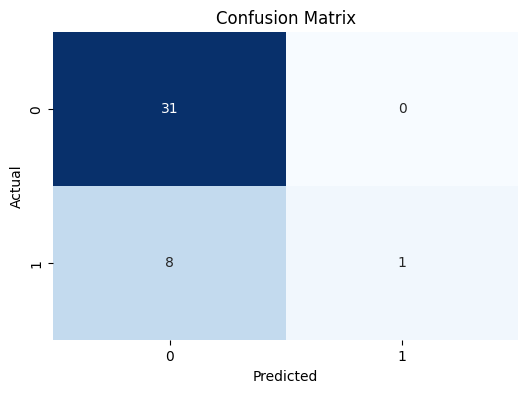

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


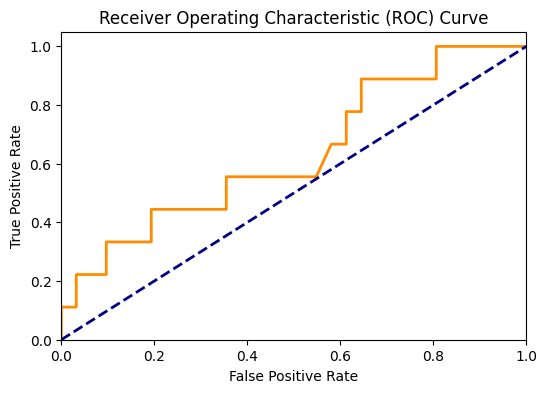

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()